In [1]:
import json
import copy
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

# Tools

In [2]:
def display(coords):
    coords = np.asarray(coords)
    plt.plot(
        coords[:,0],
        coords[:,1],
        'o'
    )
    for i,c in enumerate(coords):
        plt.text(c[0], c[1], str(i))
        
def cc_coords(unordered_coords):
    """If the motif is a convex, then a hull can be used to easily order boundary points automatically."""
    from scipy import spatial
    unordered_coords = np.asarray(unordered_coords)
    hull = scipy.spatial.ConvexHull(unordered_coords)

    # Guaranteed to be in counterclockwise order
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html
    cc_coords = unordered_coords[hull.vertices]
    
    return cc_coords

def polygon_area(cc_coords):
    """Compute the area of a polygon whose vertices are given in counterclockwise (cc) order."""
    cc_coords = np.asarray(cc_coords)
    
    # https://www.wikihow.com/Calculate-the-Area-of-a-Polygon
    wrapped = np.vstack((cc_coords, cc_coords[0]))
    area = (np.sum(wrapped[:-1,0] * wrapped[1:,1]) - np.sum(wrapped[:-1,1] * wrapped[1:,0])) / 2.
    
    return area

# Compute Motif Area

To compute the area of a motif:
* Option 1: Manually order the points in counterclockwise order.
* Option 2: If motif is a convex hull, there are some easy tricks to use instead.

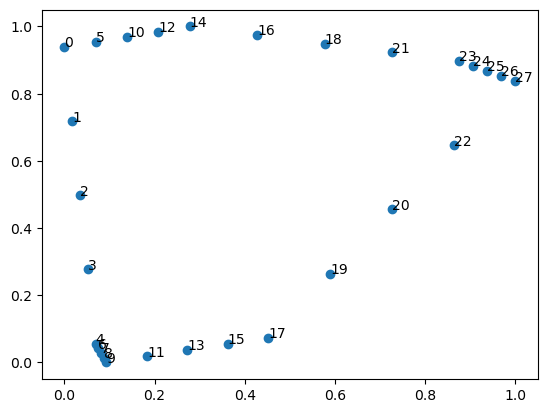

In [3]:
motif = json.load(open('../motif_library/c1_random.json', 'r'))
display(motif['coords'])

In [4]:
area = polygon_area(cc_coords(motif['coords']))

In [5]:
area

0.6464213613544406

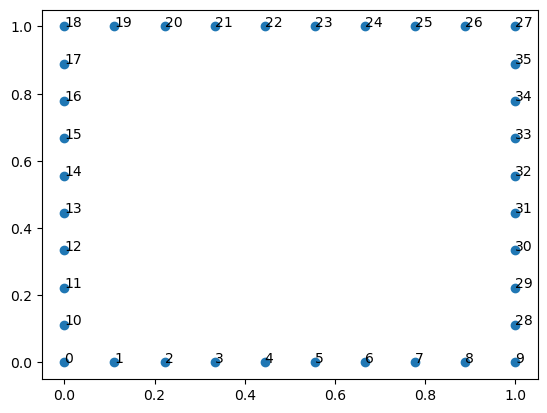

In [6]:
motif = json.load(open('../motif_library/d4_square.json', 'r'))
display(motif['coords'])

In [7]:
area = polygon_area(cc_coords(motif['coords']))

In [8]:
area

1.0

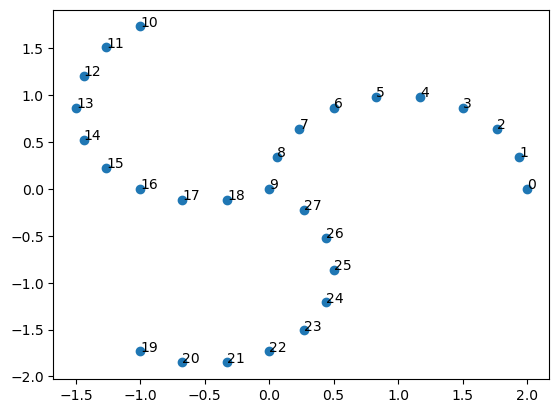

In [9]:
# With irregular shapes it might be helpful to assume a convex hull for excluded area/volume
motif = json.load(open('../motif_library/c3_swirl.json', 'r'))
display(motif['coords'])

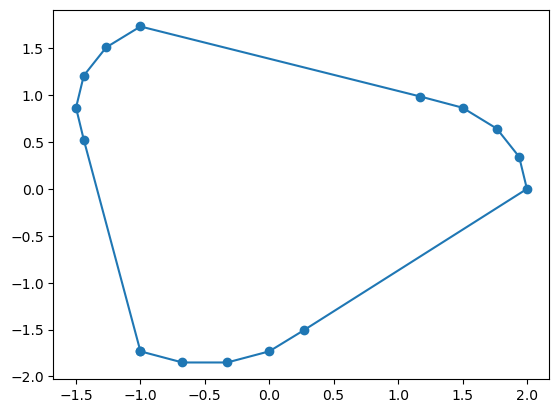

In [11]:
x = cc_coords(motif['coords'])
x = np.vstack((x, x[0]))
_ = plt.plot(
    x[:,0],
    x[:,1],
    '-o'
)

In [12]:
area = polygon_area(cc_coords(motif['coords']))

In [13]:
area

8.055771529885257

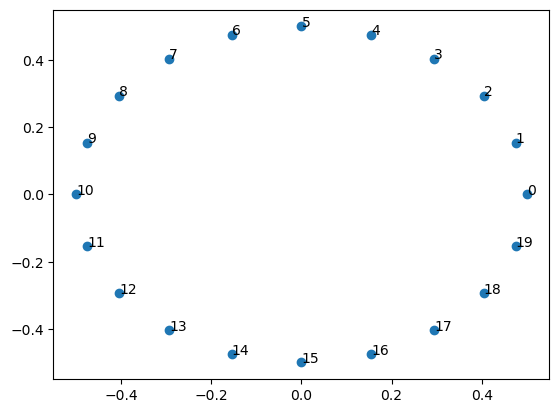

In [14]:
motif = json.load(open('../motif_library/dinf_circle.json', 'r'))
display(motif['coords'])

In [15]:
area = polygon_area(cc_coords(motif['coords']))

In [16]:
area # Area approximated by discrete points

0.7725424859373686

In [17]:
np.pi*(0.5**2) # "exact"

0.7853981633974483